In [1]:
from pandas import read_csv
from tqdm.auto import tqdm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pa = "/home/shussain/final_report/p_vs_sae_results/thresholding/experiment4"

below each panel represents training SAEs on 50 (10 runs * the 5 values of h2s but h2s doesn't matter here) datasets with different values of rho. 

0it [00:00, ?it/s]

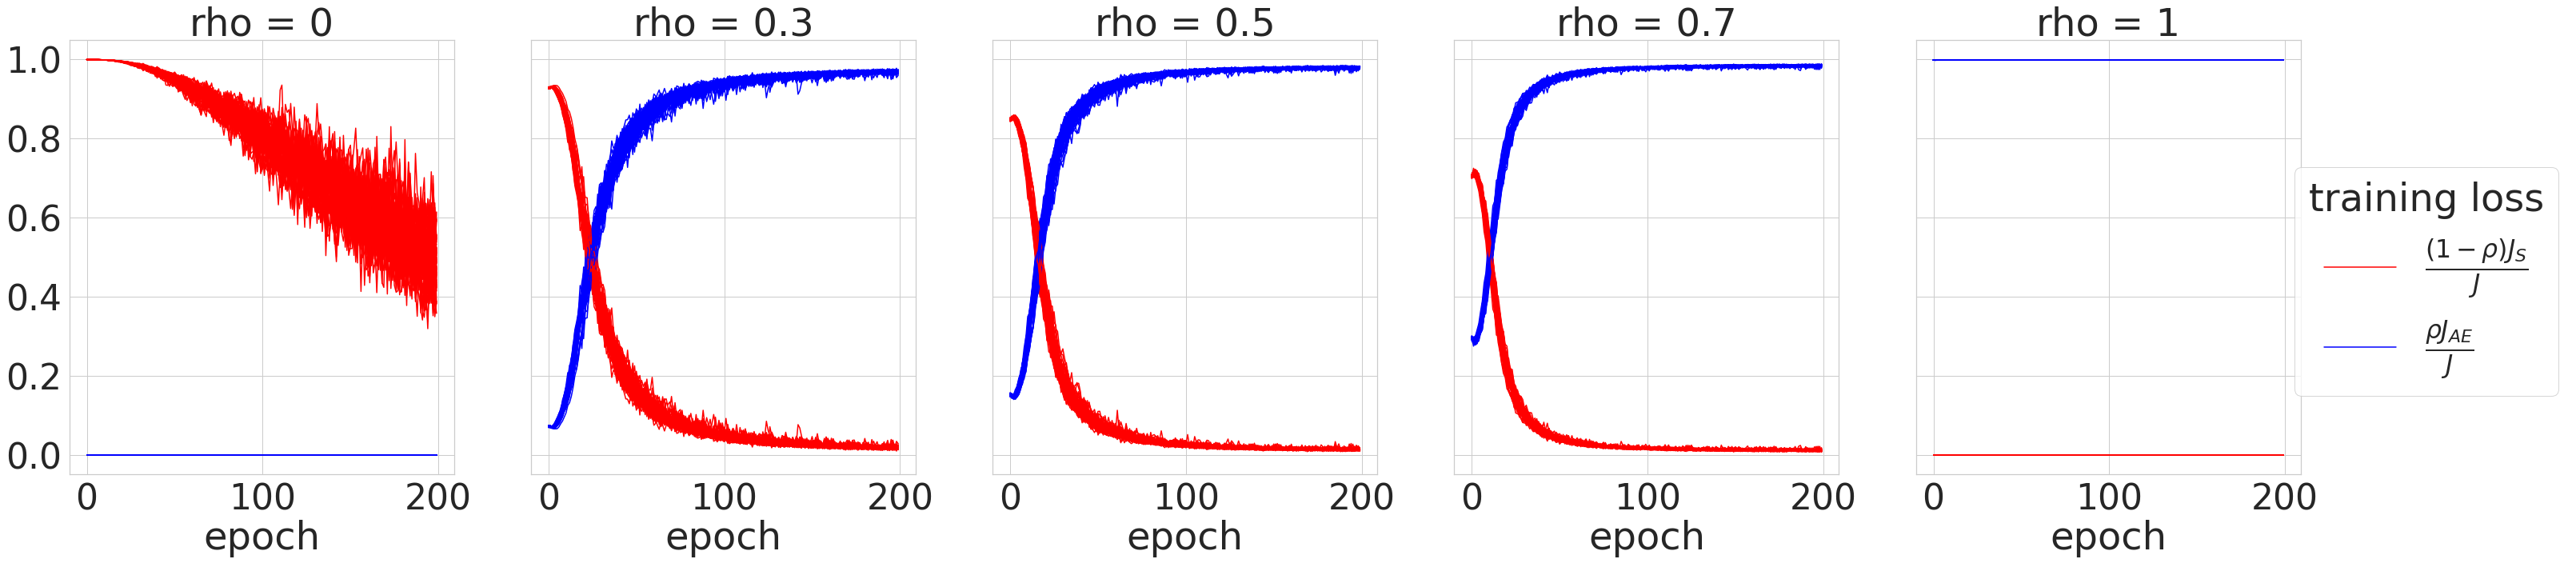

In [3]:
sns.set_theme(style="whitegrid", font_scale=4)
fig, axs = plt.subplots(1, 5, figsize=(50, 10), sharex=True, sharey=True)

H2S = [0.05, 0.25, 0.5, 0.75, 1]
rhos = ['0', '0.3', '0.5', '0.7', '1']

for i, h2s in tqdm(enumerate(H2S)):
    for j, rho in enumerate(rhos):
        plt.sca(axs[j])
        for r in range(1, 11):
            p = pa + "/plots/"
            hist = read_csv(f"{p}simulation_output{r}/{h2s}/loss_{rho}.csv")
            l1 = plt.plot((1-float(rho))*hist["clf_loss"]/hist["loss"], color="red")[0]
            l2 = plt.plot(float(rho)*hist["decoder_loss"]/hist["loss"], color="blue")[0]   
            plt.title(f"rho = {rho}")
            plt.xlabel("epoch")
            
fig.legend([l1, l2], [r"$\frac{(1-\rho)J_S}{J}$", r"$\frac{\rho J_{AE}}{J}$"], loc="center right", prop={'size': 45}, title="training loss")
plt.savefig("training.jpeg")

this first plot is the ratios of the two training losses (classification and reconstruction) over the training loss. The first panel is wrong as it should be two constant lines at 0 and 1 respectively. I will try to explain this behavor later. In the nonextreme cases, classification loss dominates pretty early on. The value of rho just slightly affects how dominant it actually is. In the long run, the optimizer first optimizes for classification as observed in last week's meeting.

0it [00:00, ?it/s]

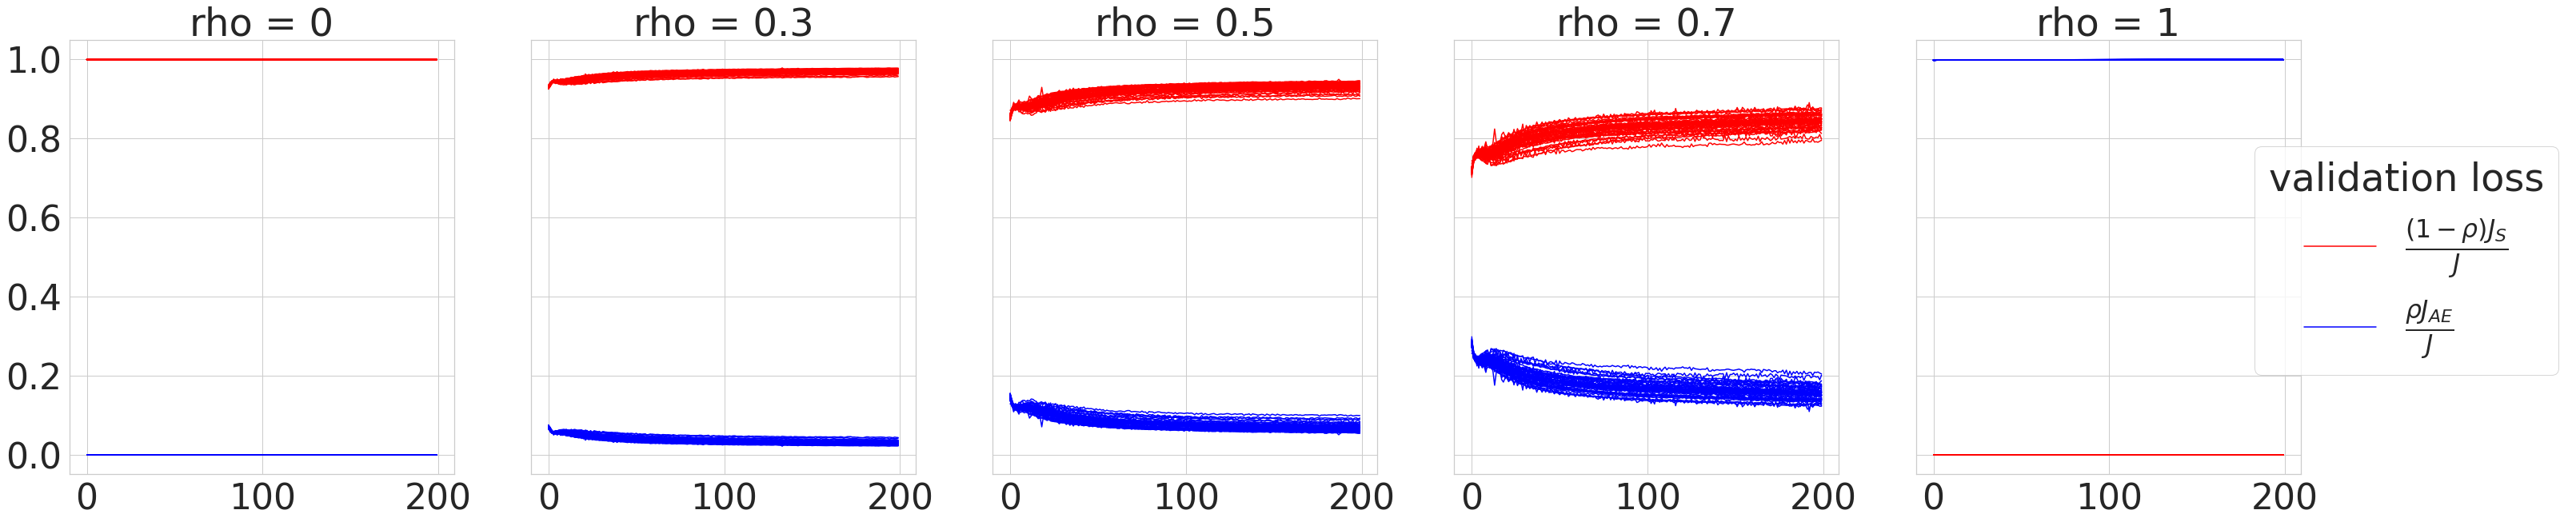

In [4]:
sns.set_theme(style="whitegrid", font_scale=4)
fig, axs = plt.subplots(1, 5, figsize=(50, 10), sharex=True, sharey=True)

H2S = [0.05, 0.25, 0.5, 0.75, 1]
rhos

for i, h2s in tqdm(enumerate(H2S)):
    for j, rho in enumerate(rhos):
        plt.sca(axs[j])
        for r in range(1, 11):
            p = pa + "/plots/"
            hist = read_csv(f"{p}simulation_output{r}/{h2s}/loss_{rho}.csv")
            l1 = plt.plot((1-float(rho))*hist["val_clf_loss"]/hist["val_loss"], color="red")[0]
            l2 = plt.plot(float(rho)*hist["val_decoder_loss"]/hist["val_loss"], color="blue")[0]   
            plt.title(f"rho = {rho}")
            
fig.legend([l1, l2], [r"$\frac{(1-\rho)J_S}{J}$", r"$\frac{\rho J_{AE}}{J}$"], loc="center right", prop={'size': 45}, title="validation loss")
           
plt.savefig("val.jpeg")       

Same plot but on the validation set. We are overfitting the classification criteria. 

0it [00:00, ?it/s]

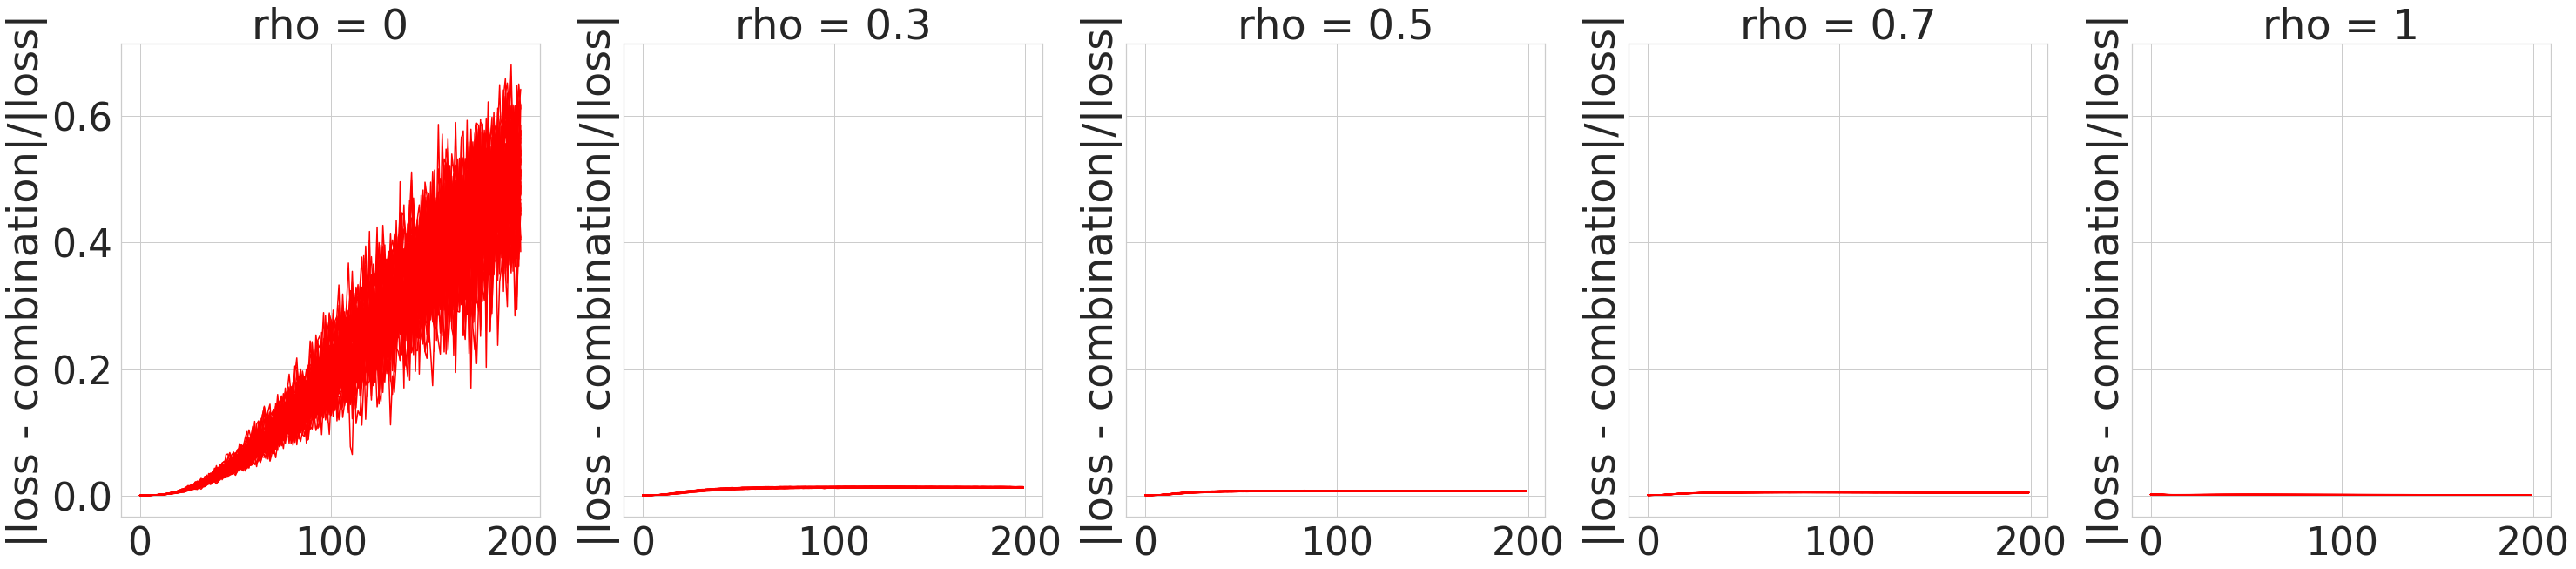

In [5]:
sns.set_theme(style="whitegrid", font_scale=4)
fig, axs = plt.subplots(1, 5, figsize=(50, 10), sharex=True, sharey=True)

H2S = [0.05, 0.25, 0.5, 0.75, 1]
rhos

for i, h2s in tqdm(enumerate(H2S)):
    for j, rho in enumerate(rhos):
        plt.sca(axs[j])
        for r in range(1, 11):
            p = pa + "/plots/"
            hist = read_csv(f"{p}simulation_output{r}/{h2s}/loss_{rho}.csv")
            l1 = plt.plot(np.abs(hist["loss"] - (1-float(rho))*hist["clf_loss"] - float(rho)*hist["decoder_loss"])/np.abs(hist["loss"]), color="red")[0] 
            plt.title(f"rho = {rho}")
            plt.ylabel("|loss - combination|/|loss|")

plt.savefig("delta.jpeg")

This plot shows the relative numeric error between the loass the convex combination. This is what I think is happening in the first panel above. There is a lot of error when rho=0. I don't know why this happens. 

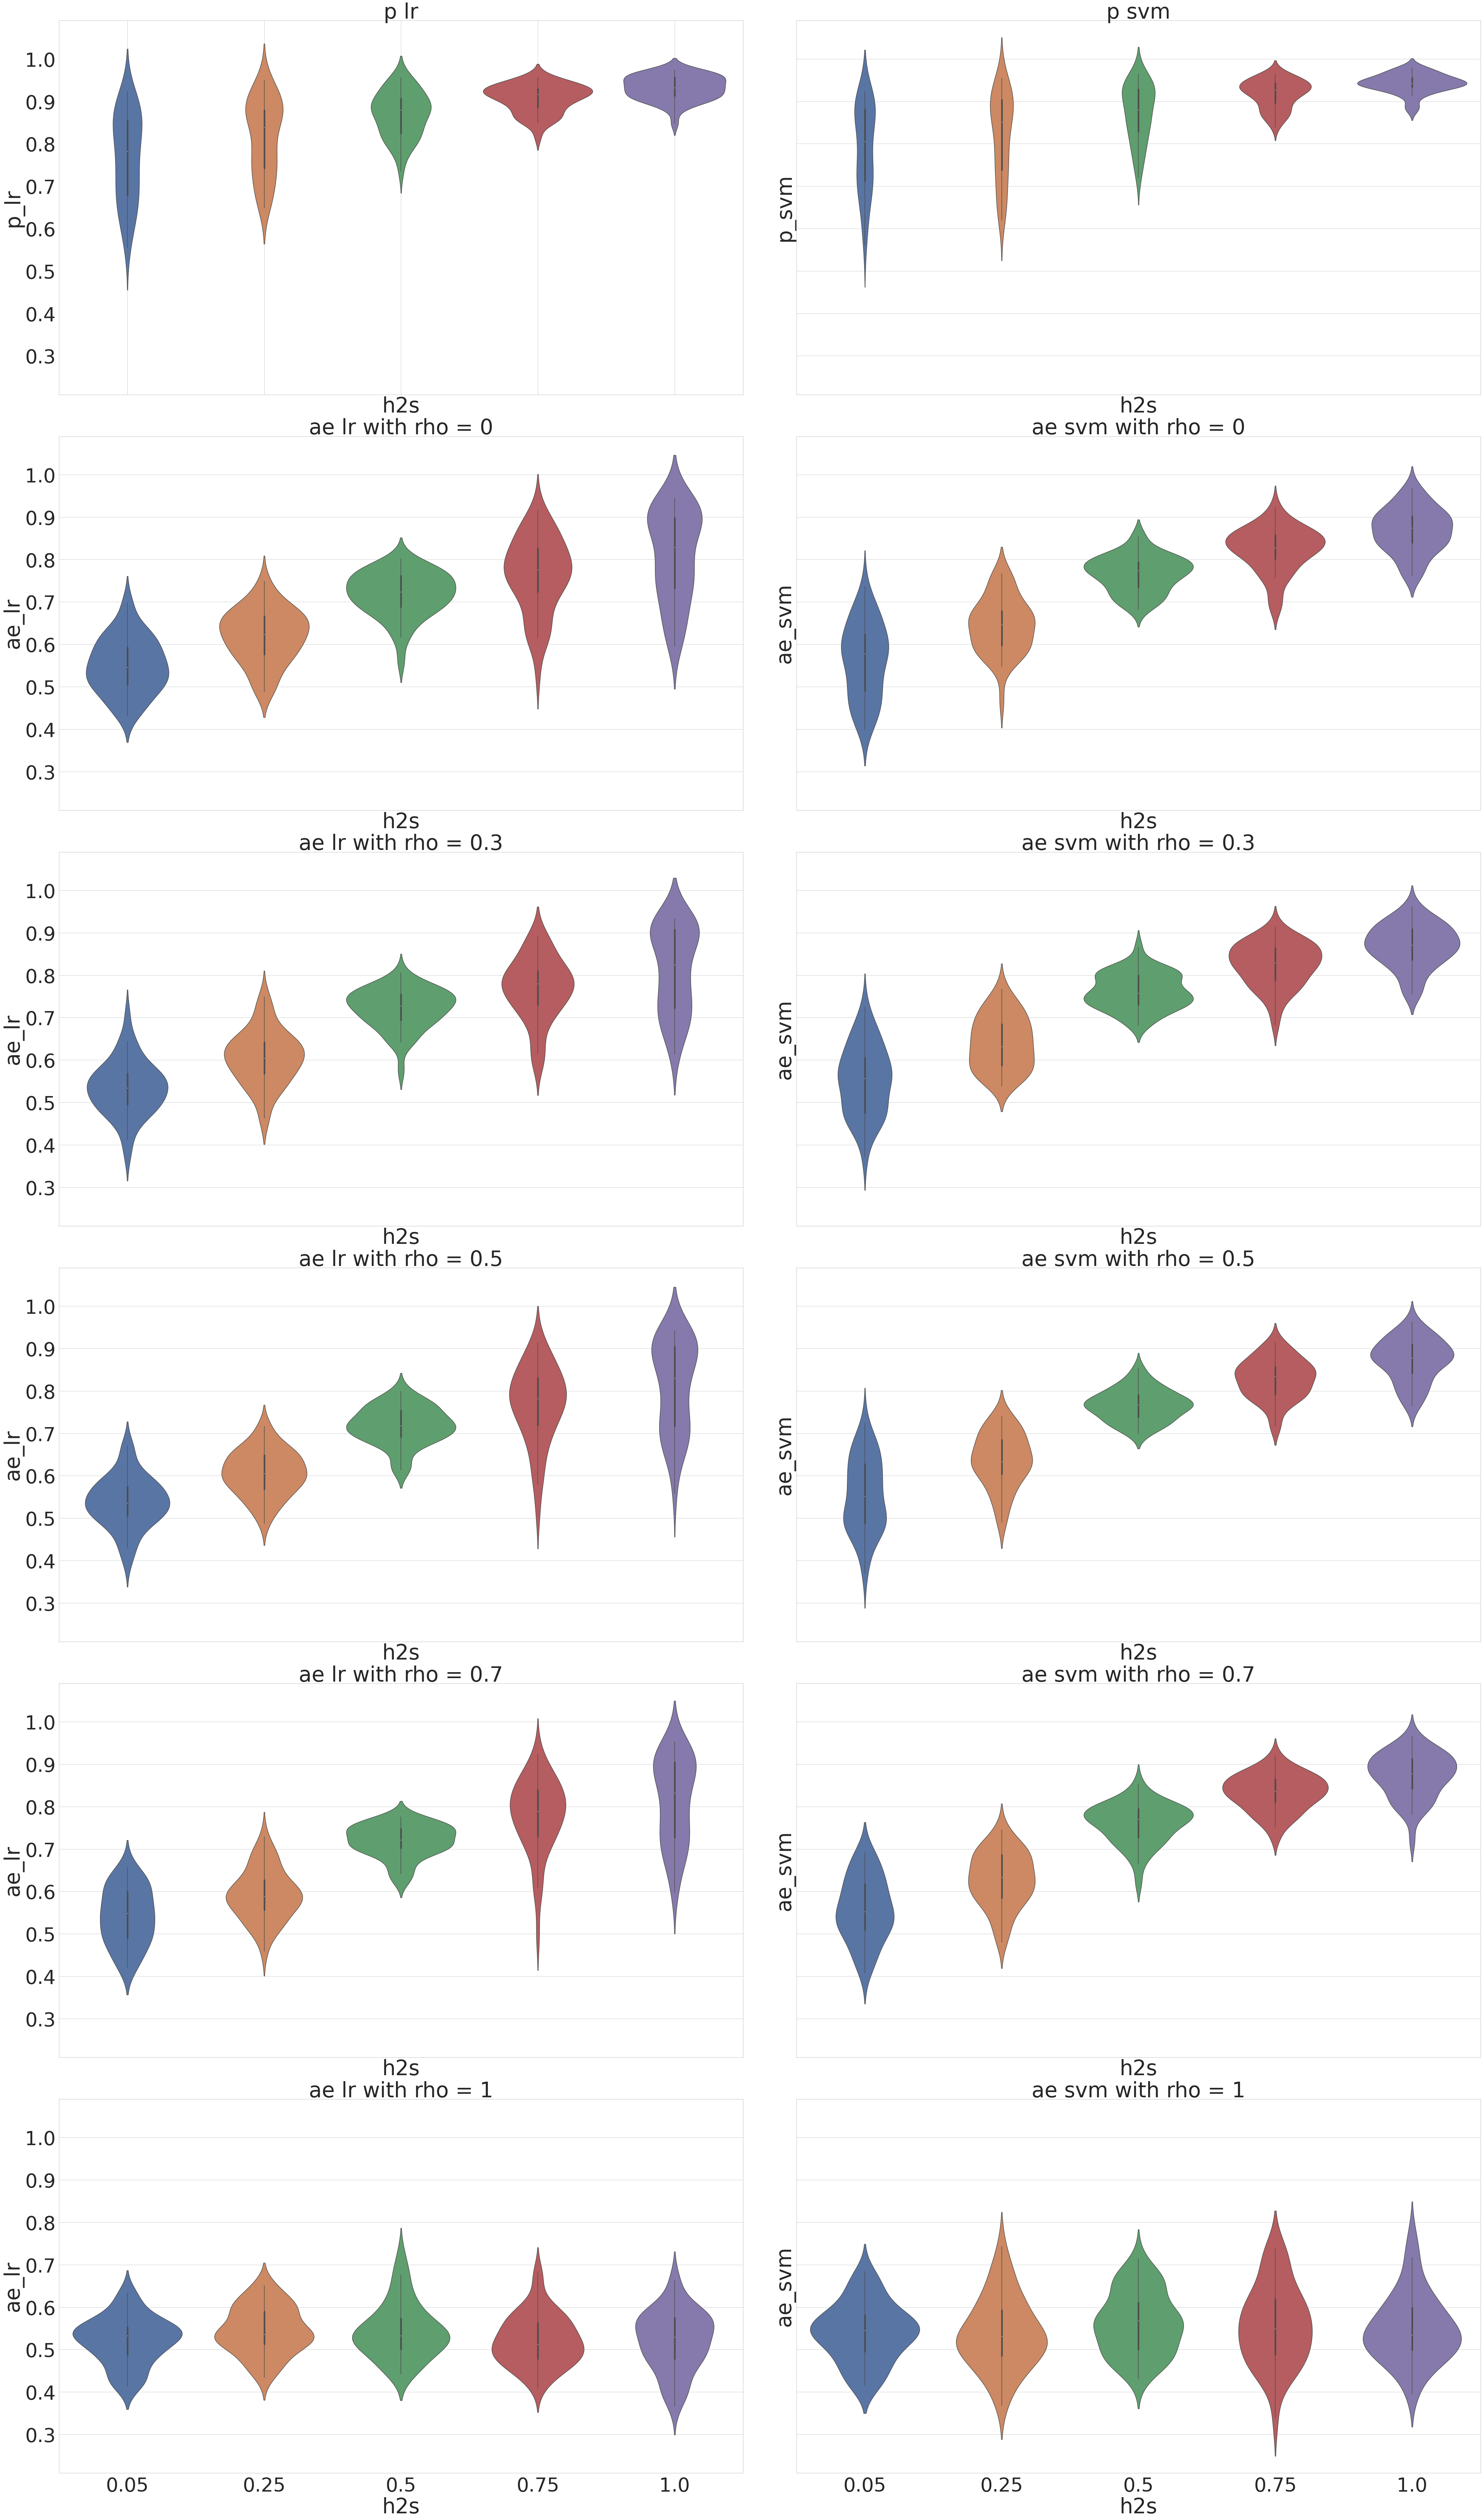

In [6]:
ae = read_csv(pa + "/ae_thresholding.csv")
p = read_csv(pa + "/p_thresholding.csv")

sns.set_theme(style="whitegrid", font_scale=5)

fig, axs = plt.subplots(6, 2, figsize=(60, 100), sharex=True, sharey=True)
plt.tight_layout()

rhos = ["0", "0.3", "0.5", "0.7", "1"]

df = p

plt.sca(axs[0, 0])
sns.violinplot(x=df["h2s"], y=df["p_lr"])
plt.title("p lr")

plt.grid()

plt.sca(axs[0, 1])
sns.violinplot(x=df["h2s"], y=df["p_svm"])
plt.title("p svm")



for row, rho in zip(range(1, 6), rhos):
    df = ae.query(f"rho == {rho}")
    plt.sca(axs[row, 0])
    sns.violinplot(x=df["h2s"], y=df[f"ae_lr"])
    plt.title(f"ae lr with rho = {rho}")
    
    plt.sca(axs[row, 1])
    sns.violinplot(x=df["h2s"], y=df[f"ae_svm"])
    plt.title(f"ae svm with rho = {rho}")

plt.savefig(pa + "/res.jpeg")

In [25]:
import pandas as pd

df = pd.read_csv("/home/shussain/hapgen2/first_hapgen.controls.gen", delimiter=" +")
df

/home/shussain/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


KeyboardInterrupt: 

In [24]:
import os


for i in os.listdir("/home/shussain/hapgen2/CEU_impute/hapmap3_r2_plus_1000g_jun2010_b36_ceu/"):
    if "pilot1" in i:
        os.rename(
            "/home/shussain/hapgen2/CEU_impute/hapmap3_r2_plus_1000g_jun2010_b36_ceu/" + i,
            "/home/shussain/hapgen2/CEU_impute/1000G_Pilot1/" + i 
        )

In [28]:
import time 
import datetime as dt

dir(dt)

['MAXYEAR',
 'MINYEAR',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'date',
 'datetime',
 'datetime_CAPI',
 'sys',
 'time',
 'timedelta',
 'timezone',
 'tzinfo']

In [48]:
dt.date.today()

datetime.date(2021, 6, 14)